[Indice](index.ipynb) | Previo: [Aplicaciones.OndasGravitacionales.Deteccion](03.01.04.00.Aplicaciones.OndasGravitacionales.Deteccion.ipynb) | Siguiente: [Aplicaciones.OndasGravitacionales.Emision](03.01.06.00.Aplicaciones.OndasGravitacionales.Emision.ipynb)

### 3.1.17. Simulación de una señal
<a id='simulacion_senal'></a>

Usando lo visto hasta aquí podemos intentar simular la señal de una o varias ondas gravitacionales llegando a uno o varios detectores interferométricos como LIGO.

Para ello usaremos la ecuación deducida en la sección anterior:

$$
\frac{\delta I}{I_0}=\pi^2\left(\frac{\Delta L}{\lambda}\right)^2
$$
donde $\Delta L=\delta L_y-\delta L_x$ y $\delta L_i$ es el cambio en la distancia medido a lo largo del eje $i$ del detector.

La primera condición que debemos entender en un caso completamente general es que la plano y orientación del detector no necesariamente es: 1) perpendicular a la dirección de proveniencia de la onda y 2) los brazos del detector no necesariamente coinciden con la dirección de la polarización de la onda (el eje $x$ sobre el que definimos la amplitud $a_+$.

#### 3.1.17.1. Detector con orientación arbitraria
<a id='detector_arbitrario'></a>

Podemos resolver el primer problema mostrando que la distancia entre el origen de coordenadas y un punto situado en cualquier lugar $(x,y,z)=L_0(n^x,n^y,n^z)$ en el detector, cambia de acuerdo con la expresión (ver Problemas al final del capítulo):

$$
\delta L(t)=\frac{1}{2}\int_0^{L_0} h_{ij}(ct-n^z s)n^i n^j\;\mathrm{d}s
$$

Las coordenadas del punto y dirección del vector unitario $\hat n$ están en el sistema de referencia de la onda gravitacional.  Más interesante aún sería expresar el mismo resultado pero en el sistema de referencia del detector que indicaremos aquí con coordenadas primadas.

Si suponemos que la onda gravitacional se propaga en dirección $\hat{k}'$ en el sistema de referencia del detector (que coincide con la dirección del eje $z$ del sistema de referencia de la onda gravitacional), dirección que podemos cuantificar con su distancia cenital $z$ y su azimut $A$, la relación entre las componentes de un vector cualquiera $\vec{A}'$ en el sistema de referencia del detector y las mismas componentes pero en el sistema de referencia de la onda $\vec{V}$ serán:

$$
\vec{V}=R_x(z)R_z(A)\vec{V}'
$$
donde $R_z(A)$ es una matriz de rotación alrededor del eje $z$ en un ángulo $A$, en sentido contrario de las manecillas del reloj:

$$
R_z(A)=
\left( \begin{array}{ccc}
   \cos A & \sin A & 0\\
   -\sin A & \cos A & 0\\  
   0 & 0 & 1
   \end{array} \right)
$$
análogamente:

$$
R_x(z)=
\left( \begin{array}{ccc}
   1 & 0 & 0\\
   0 & \cos z & \sin z\\
   0 & -\sin z & \cos z
   \end{array} \right)
$$


La matriz de rotación resultante será:

\begin{eqnarray}
\nonumber
R_x(z)R_z(A) & = & 
\left( \begin{array}{ccc}
1 & 0 & 0\\
0 & \cos z & \sin z\\
0 & -\sin z & \cos z
\end{array} \right)
\left( \begin{array}{ccc}
\cos A & \sin A & 0\\
-\sin A & \cos A & 0\\  
0 & 0 & 1
\end{array} \right)\\
& = & 
\nonumber
\left( \begin{array}{ccc}
\cos A & \sin A & 0\\
-\sin A\cos z & \cos A \cos z & \sin z \\
\sin A\sin z & -\cos A\sin z & \cos z
\end{array} \right)
\end{eqnarray}

Como solamente me interesa saber las direcciones de los brazos del detector, que en su sistema de referencia corresponen a $\hat{n}'_{(x)}:(1,0,0)$ y $\hat{n}'_{(y)}:(0,1,0)$, los únicos dos puntos de interés para calcular el cambio en la longitud de los brazos serán:

$$
\begin{array}{rcl}
\hat{n}_{(x)} & : & (\cos A,-\sin A\cos z,\sin A\cos z)\\
\hat{n}_{(y)} & : & (\sin A,\cos A\cos z,-\cos A\sin z)\\
\end{array}
$$

Nótese que si la onda gravitacional se dirige hacia arriba $z=0$ de modo que su eje $x$ coincide con el eje $x$ del detector, $A=0$ las componentes de los vectores unitarios en el sistema de la onda coincidiran con las del detector.  Si por el contrario la onda se dirige directamente hacia abajo ($z=\pi,A=0$), el eje $y$ del detector corresponderá al negativo del eje $y$ de la onda, lo que coincide con nuestras expectativas.

#### 3.1.17.2. Suma de ondas gravitacionales
<a id='suma_ondas'></a>

Dado que estamos bajo la aproximación de gravedad linearizada, sabemos que si $N$ ondas inciden sobre el detector produciran una perturbación total $H_{ij}$ que será simplemente la suma de todas las ondas individuales:

$$
H_{ij}(u)=\sum_{n=1}^{N} h^{(n)}_{ij}(u;k^{(n)},a_{+}^{(n)},a_{{}\times{}}^{(n)},\phi^{(n)})
$$
donde asumimos que todas las ondas vienen de la misma dirección y están polarizadas en la misma dirección y $u=ct-z$.

Donde la perturbación métrica es:

$$
h_{ij}(u;k,a_{+},a_{{}\times{}},\phi)=
\left\{
\begin{array}{ll}
0 & \mathrm{Si}\;i=3\;\mathrm{ó}\;j=3\\
a_{{}\times{}} \cos(k u + \phi) & \mathrm{Si}\;i\neq j\\
a_+ \cos(k u + \phi) & \mathrm{Si}\;i=j=1\\
-a_+ \cos(k u + \phi) & \mathrm{Si}\;i=j=2\\
\end{array}
\right.
$$


#### 3.1.17.3. Implementación numérica
<a id='implementacion_numerica'></a>

Vamos ahora a ensamblar las componentes que hemos desarrollado anteriormente.

Para ello comenzamos definiendo la perturbación de la onda debida a la superposición de muchas ondas planas:

In [239]:
from numpy import cos
CLIGHT=3e8 # m/s
def Hij(i,j,u,ondas):
    ks=2*pi*ondas["f"]/CLIGHT
    coskus=cos(ks*u+ondas["fi"])
    if i==3 or j==3:return 0
    if i!=j:h=(ondas["ac"]*coskus).sum()         
    elif i==1:h=(ondas["ap"]*coskus).sum()
    elif i==2:h=(-ondas["ap"]*coskus).sum()
    return h

Las propiedades de las ondas son:

In [322]:
#Propiedades de la onda plana
from numpy import array
ondas=dict(
    f=array([100,100]), # Hertz
    ap=array([1e-21,1e-21]),
    ac=array([0.0,0.0]),
    fi=array([0,0]), # Rad
)
#Periodo de la primera onda
P=1/ondas["f"][0] #Segundos

#Dirección de proveniencia
from numpy import pi
A=0*pi/180 # Rad
z=0*pi/180 # Rad

#Vectores unitarios
from numpy import cos,sin
nx=array([cos(A),-sin(A)*cos(z),sin(A)*cos(z)])
ny=array([sin(A),cos(A)*cos(z),-cos(A)*sin(z)])

In [323]:
print(f"Período onda 1 = {P} segundos")
print(f"n(x) = {nx}")
print(f"n(y) = {ny}")

Período onda 1 = 0.01 segundos
n(x) = [ 1. -0.  0.]
n(y) = [ 0.  1. -0.]


Con estas propiedades, valores típicos de la perturbación métrica serán:

In [324]:
print(f"H_11(u=0) = {Hij(1,1,0,ondas)}")
print(f"H_22(u=0) = {Hij(2,2,0,ondas)}")
print(f"H_12(u=0) = {Hij(1,2,0,ondas)}")

H_11(u=0) = 2e-21
H_22(u=0) = -2e-21
H_12(u=0) = 0.0


Las propiedades del detector serán:

In [325]:
detector=dict(
    #Tamaño de los brazos
    L=1.2e6, # metros
    #Longitud de onda
    lamb=6.0e-7, #metros
)

El cambio en la distancia en dirección al vector $\hat{n}$ se puede calcular con esta rutina:

In [326]:
from scipy.integrate import quad as integral
def deltaL(t,n,ondas,detector):
    def integrando(s):
        u=CLIGHT*t-n[2]*s
        return Hij(1,1,u,ondas)*n[0]*n[0]+\
               Hij(2,2,u,ondas)*n[1]*n[1]+\
               2*Hij(1,2,u,ondas)*n[0]*n[1]
    dL=integral(integrando,0,detector["L"])[0]
    return dL

Valores típicos de la deformación de los brazos del detector serán:

In [327]:
print(f"delta L (0,nx) = {deltaL(0,nx,ondas,detector)}")
print(f"delta L (0,ny) = {deltaL(0,ny,ondas,detector)}")

delta L (0,nx) = 2.4e-15
delta L (0,ny) = -2.4e-15


Ahora necesitamos implementar una rutina que nos dé la señal:

In [328]:
def Iinterf(t,n_x,n_y,ondas,detector):
    dL_x=deltaL(t,n_x,ondas,detector)
    dL_y=deltaL(t,n_y,ondas,detector)
    DL=dL_y-dL_x
    deltaI=pi**2*(DL/detector["lamb"])**2
    return deltaI

Un valor típico de la señal de interferencia será:

In [329]:
print(f"dI/I (t=0) = {Iinterf(0,nx,ny,ondas,detector)}")

dI/I (t=0) = 6.316546816697189e-16


In [330]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


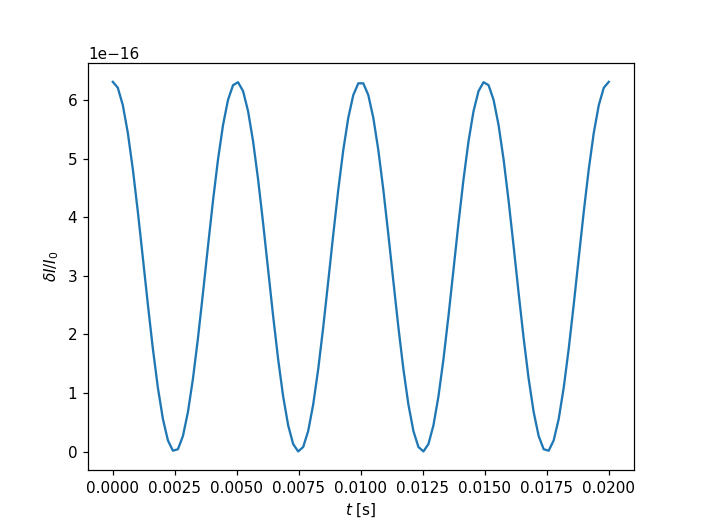

In [333]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

from numpy import linspace
ts=linspace(0,2*P,100)
deltaIs=[]
for t in ts:
    deltaIs+=[Iinterf(t,nx,ny,ondas,detector)]
ax.plot(ts,deltaIs)

ax.set_xlabel("$t$ [s]")
ax.set_ylabel("$\delta I/I_0$");

<a id='fig:03.01.05.00.Aplicaciones.OndasGravitacionales.SimulacionSenal_55'></a><center><b>Figura 3.55.</b> </center>

Ahora podemos poner todos los elementos juntos para producir una simulación completa:

In [334]:
plt.close("all")
def senal_simulada(A=0,z=0,
                   f1=100,f2=100,
                   ap1=1,ap2=1,
                   ac1=0,ac2=0,
                   fi1=0,fi2=0):
    #Propiedades de la onda plana
    from numpy import array
    from numpy import pi
    ondas=dict(
        f=array([float(f1),float(f2)]), # Hertz
        ap=array([float(ap1),float(ap2)])*1e-21,
        ac=array([float(ac1),float(ac2)])*1e-21,
        fi=array([float(fi1),float(fi2)])*pi/180, # Rad
    )
    #Periodo de la primera onda
    P=1/ondas["f"][0] #Segundos

    #Dirección de proveniencia
    A=float(A)*pi/180 # Rad
    z=float(z)*pi/180 # Rad

    #Vectores unitarios
    from numpy import cos,sin
    nx=array([cos(A),-sin(A)*cos(z),sin(A)*cos(z)])
    ny=array([sin(A),cos(A)*cos(z),-cos(A)*sin(z)])

    #Gráfico
    import matplotlib.pyplot as plt
    fig=plt.figure()
    ax=fig.gca()

    from numpy import linspace
    ts=linspace(0,2*P,100)
    deltaIs=[]
    for t in ts:
        deltaIs+=[Iinterf(t,nx,ny,ondas,detector)]
    ax.plot(ts,deltaIs)

    #Decoración
    ax.set_xlabel("$t$ [s]");
    ax.set_ylabel("$\delta I/I_0$");
    dImax=1.2*pi**2*(2*detector["L"]*(ondas["ap"].sum()+\
                                      ondas["ac"].sum())\
                                     /detector["lamb"])**2
    ax.set_ylim((0,dImax));
    
    
from ipywidgets import interact,fixed,widgets
opciones=dict(continuous_update=False)
interact(senal_simulada,
         A=widgets.FloatSlider(value=0,min=0,max=360,step=1,**opciones),
         z=widgets.FloatSlider(value=0,min=0,max=180,step=1,**opciones),
         f2=widgets.FloatSlider(value=100,min=1e-1,max=1e3,step=10,**opciones),
         fi2=widgets.FloatSlider(value=0,min=0,max=360,step=1,**opciones),
         ap2=widgets.FloatSlider(value=0,min=0.0,max=10.0,step=0.1,**opciones),
         ac2=widgets.FloatSlider(value=0,min=0,max=10.0,step=0.1,**opciones),
         f1=fixed(100),ap1=fixed(1),ac1=fixed(0),fi1=fixed(0)
        );

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='A', max=360.0, step=1.0), F…

<a id='fig:03.01.05.00.Aplicaciones.OndasGravitacionales.SimulacionSenal_56'></a><center><b>Figura 3.56.</b> </center>

[Indice](index.ipynb) | Previo: [Aplicaciones.OndasGravitacionales.Deteccion](03.01.04.00.Aplicaciones.OndasGravitacionales.Deteccion.ipynb) | Siguiente: [Aplicaciones.OndasGravitacionales.Emision](03.01.06.00.Aplicaciones.OndasGravitacionales.Emision.ipynb)